In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [2]:
data=pd.read_csv("Company_Data.csv")
data.head(5)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


transforming sales continuous data into categorical.

In [3]:
from sklearn.preprocessing import LabelEncoder 
label_encoder=LabelEncoder()

In [4]:
data["ShelveLoc"]=label_encoder.fit_transform(data["ShelveLoc"])

In [5]:
data["Urban"]=label_encoder.fit_transform(data["Urban"])

In [6]:
data["US"]=label_encoder.fit_transform(data["US"])

In [7]:
data["sale"]=pd.cut(data["Sales"],bins=[-1,5,10,17],labels=["LOW","MEDIUM","HIGH"])

In [8]:
data["sale_type"]=label_encoder.fit_transform(data["sale"])

In [9]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sale,sale_type
0,9.50,138,73,11,276,120,0,42,17,1,1,MEDIUM,2
1,11.22,111,48,16,260,83,1,65,10,1,1,HIGH,0
2,10.06,113,35,10,269,80,2,59,12,1,1,HIGH,0
3,7.40,117,100,4,466,97,2,55,14,1,1,MEDIUM,2
4,4.15,141,64,3,340,128,0,38,13,1,0,LOW,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,HIGH,0
396,6.14,139,23,3,37,120,2,55,11,0,1,MEDIUM,2
397,7.41,162,26,12,368,159,2,40,18,1,1,MEDIUM,2
398,5.94,100,79,7,284,95,0,50,12,1,1,MEDIUM,2


0-HIGH
1-LOW
2-MEDIUM

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        400 non-null    float64 
 1   CompPrice    400 non-null    int64   
 2   Income       400 non-null    int64   
 3   Advertising  400 non-null    int64   
 4   Population   400 non-null    int64   
 5   Price        400 non-null    int64   
 6   ShelveLoc    400 non-null    int32   
 7   Age          400 non-null    int64   
 8   Education    400 non-null    int64   
 9   Urban        400 non-null    int32   
 10  US           400 non-null    int32   
 11  sale         400 non-null    category
 12  sale_type    400 non-null    int32   
dtypes: category(1), float64(1), int32(4), int64(7)
memory usage: 31.9 KB


In [11]:
data["sale_type"].value_counts()

2    245
0     78
1     77
Name: sale_type, dtype: int64

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler=MinMaxScaler()
x=scaler.fit_transform(data.iloc[:,1:11])

In [14]:
y=data.iloc[:,-1]
y

0      2
1      0
2      0
3      2
4      1
      ..
395    0
396    2
397    2
398    2
399    2
Name: sale_type, Length: 400, dtype: int32

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [43]:
model=DecisionTreeClassifier(criterion="entropy",max_depth=7)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [44]:
from sklearn import tree

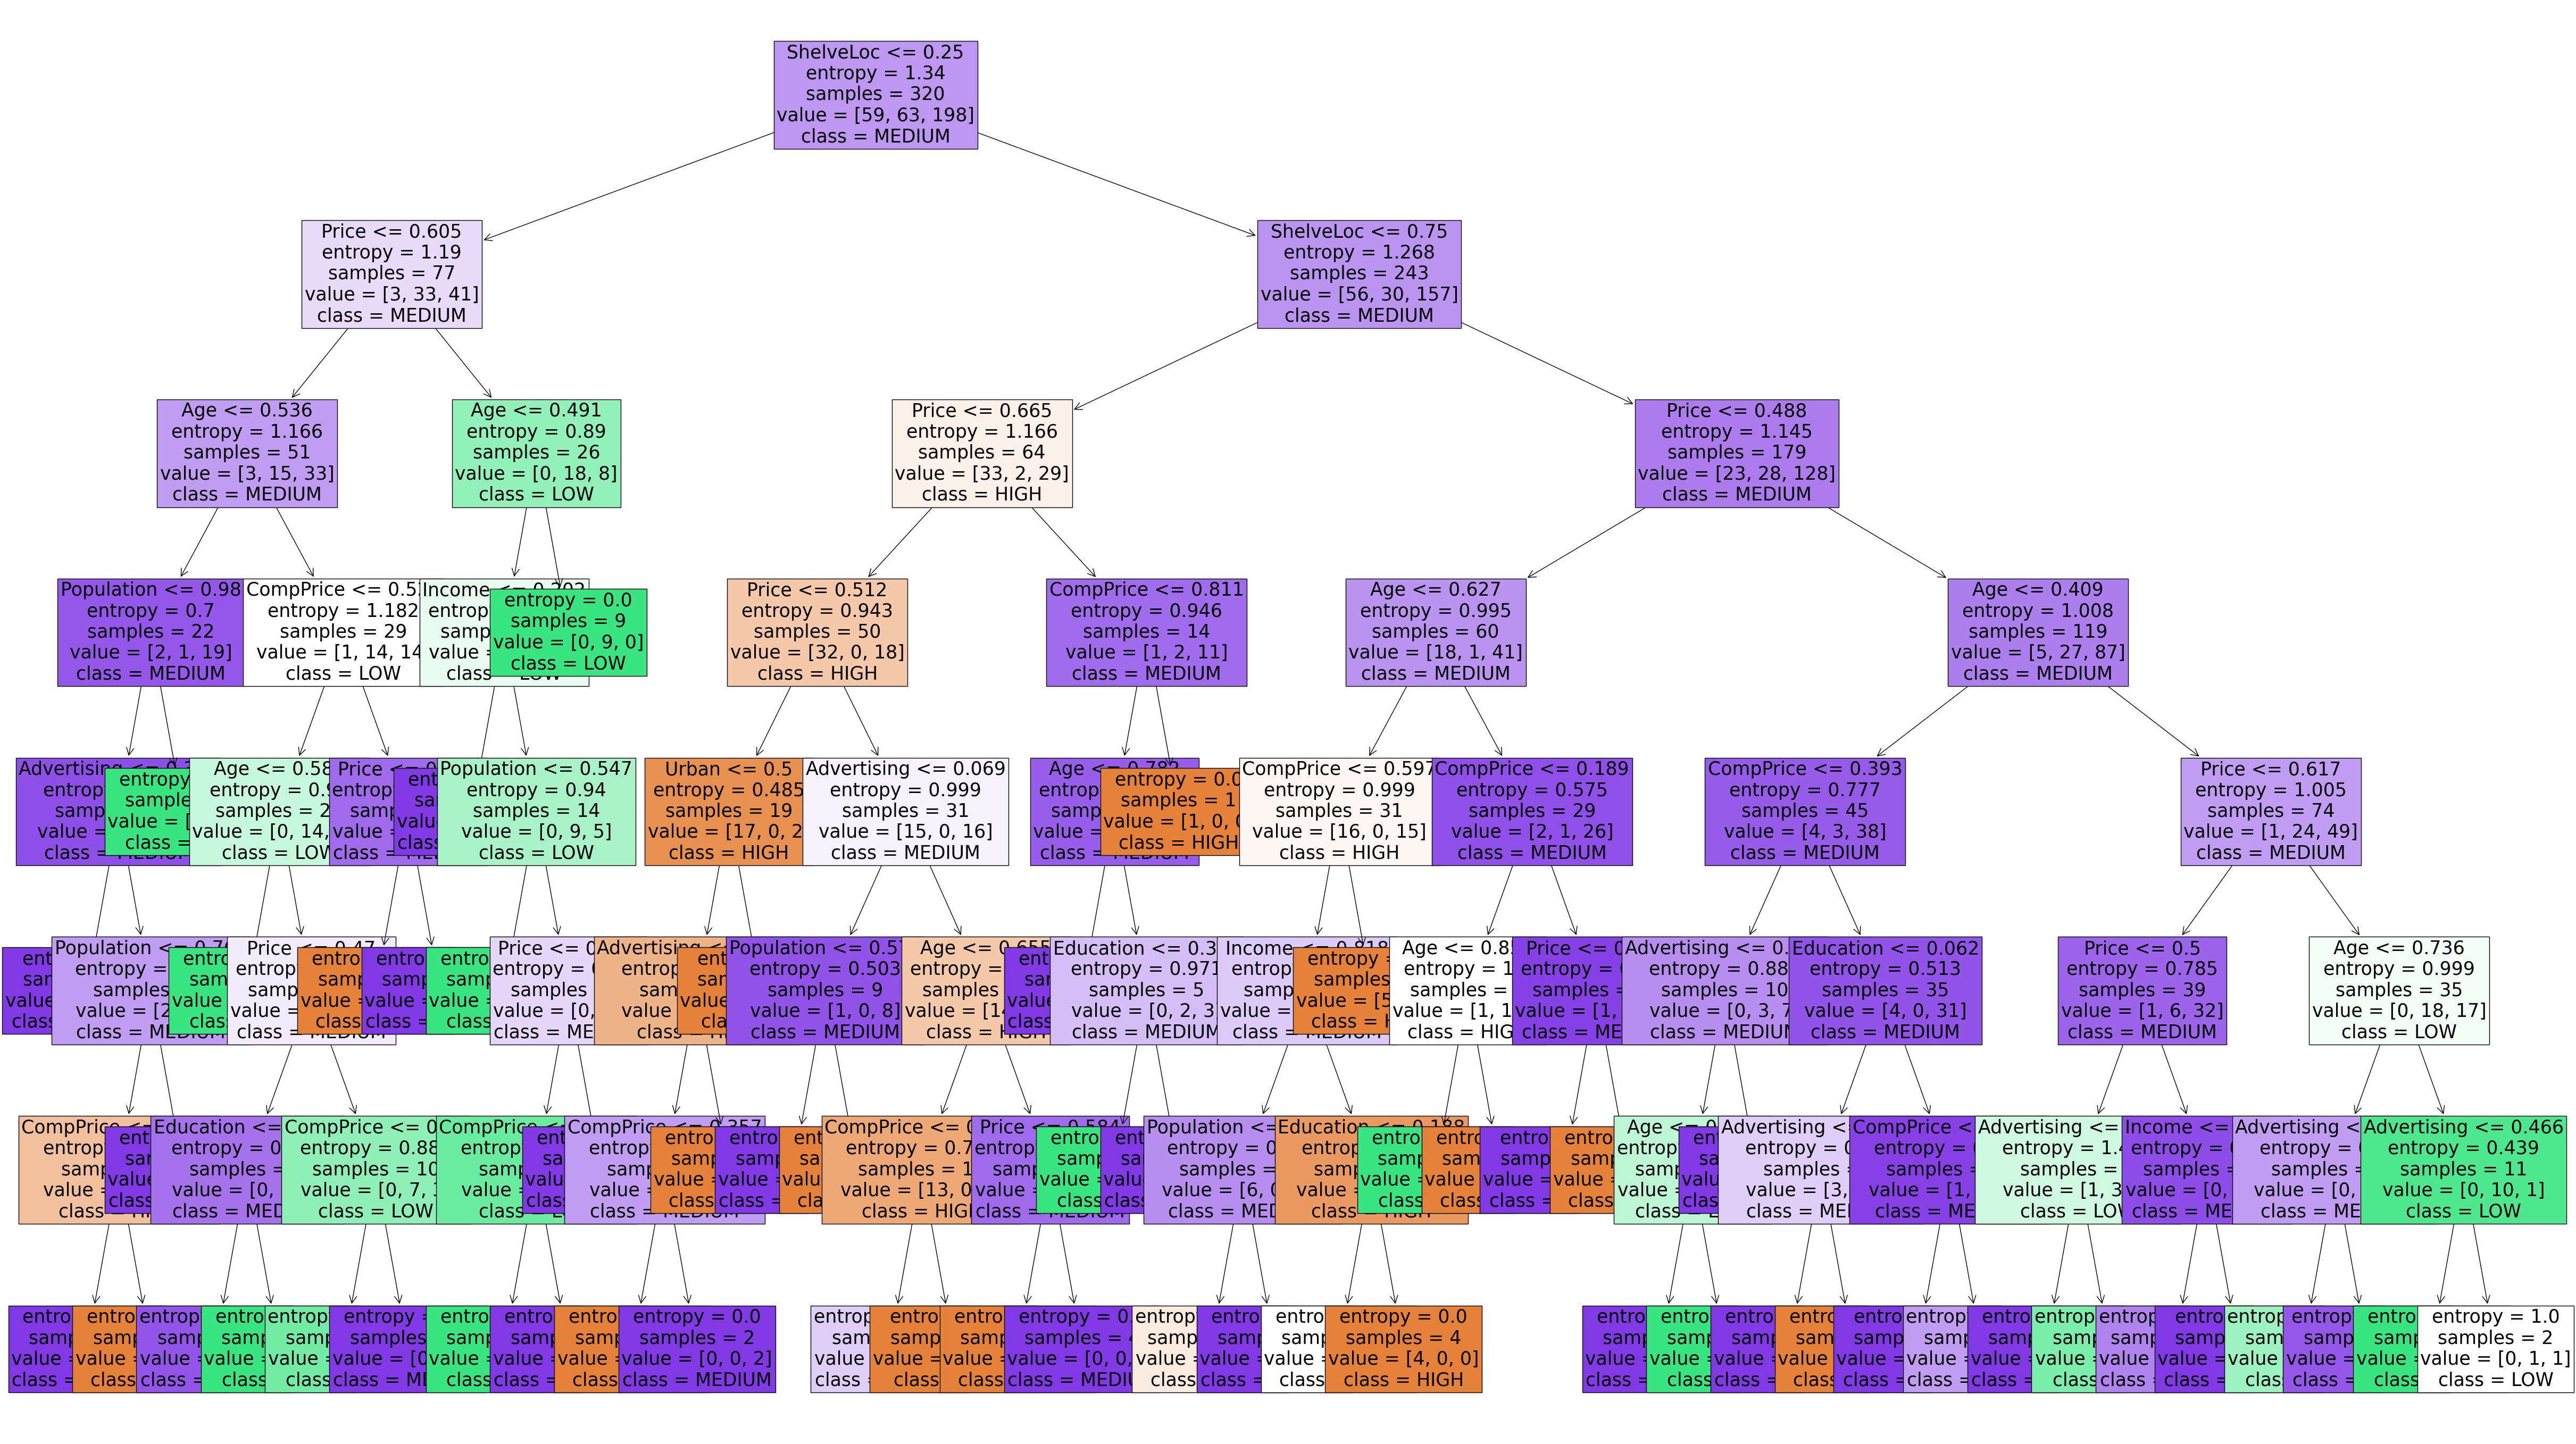

In [48]:
fn=["CompPrice","Income","Advertising","Population","Price","ShelveLoc","Age","Education","Urban","US"]
cn=['HIGH', 'LOW', 'MEDIUM']
plt.figure(figsize=(60,35))
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True,fontsize=25);

In [19]:
pred=model.predict(x_test)
pred

array([1, 1, 0, 2, 2, 2, 0, 1, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 1, 0, 2, 1, 2, 0, 1, 1, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 0, 0, 0, 0, 0, 1, 2, 2, 2,
       0, 2, 1, 0, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2])

In [56]:
np.mean(y_test==pred)*100

63.74999999999999

In [24]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.67      0.63      0.65        19
           1       0.40      0.43      0.41        14
           2       0.70      0.70      0.70        47

    accuracy                           0.64        80
   macro avg       0.59      0.59      0.59        80
weighted avg       0.64      0.64      0.64        80



In [49]:
importance=model.feature_importances_
importance

array([0.1525564 , 0.03582226, 0.10291428, 0.06624342, 0.25745464,
       0.15809   , 0.17937115, 0.03879773, 0.00875013, 0.        ])

In [50]:
featur={}
for feature,imp in zip(data.iloc[:,1:11].columns,importance):
    featur[feature]=imp

In [51]:
featur

{'CompPrice': 0.15255639522712078,
 'Income': 0.035822255686137124,
 'Advertising': 0.10291428335647074,
 'Population': 0.06624341962922332,
 'Price': 0.25745463742938657,
 'ShelveLoc': 0.158089995487572,
 'Age': 0.17937114610895,
 'Education': 0.0387977333464362,
 'Urban': 0.008750133728703237,
 'US': 0.0}

In [52]:
imp_df=pd.DataFrame({"features":data.iloc[:,1:11].columns,"importance":importance})
imp_df

,features,importance
0,CompPrice,0.152556
1,Income,0.035822
2,Advertising,0.102914
3,Population,0.066243
4,Price,0.257455
5,ShelveLoc,0.158090
6,Age,0.179371
7,Education,0.038798
8,Urban,0.008750
9,US,0.000000


In [53]:
imp_df.sort_values(by="importance",ascending=False)

,features,importance
4,Price,0.257455
6,Age,0.179371
5,ShelveLoc,0.158090
0,CompPrice,0.152556
2,Advertising,0.102914
3,Population,0.066243
7,Education,0.038798
1,Income,0.035822
8,Urban,0.008750
9,US,0.000000


In [54]:
import seaborn as sns

<AxesSubplot:xlabel='features', ylabel='importance'>

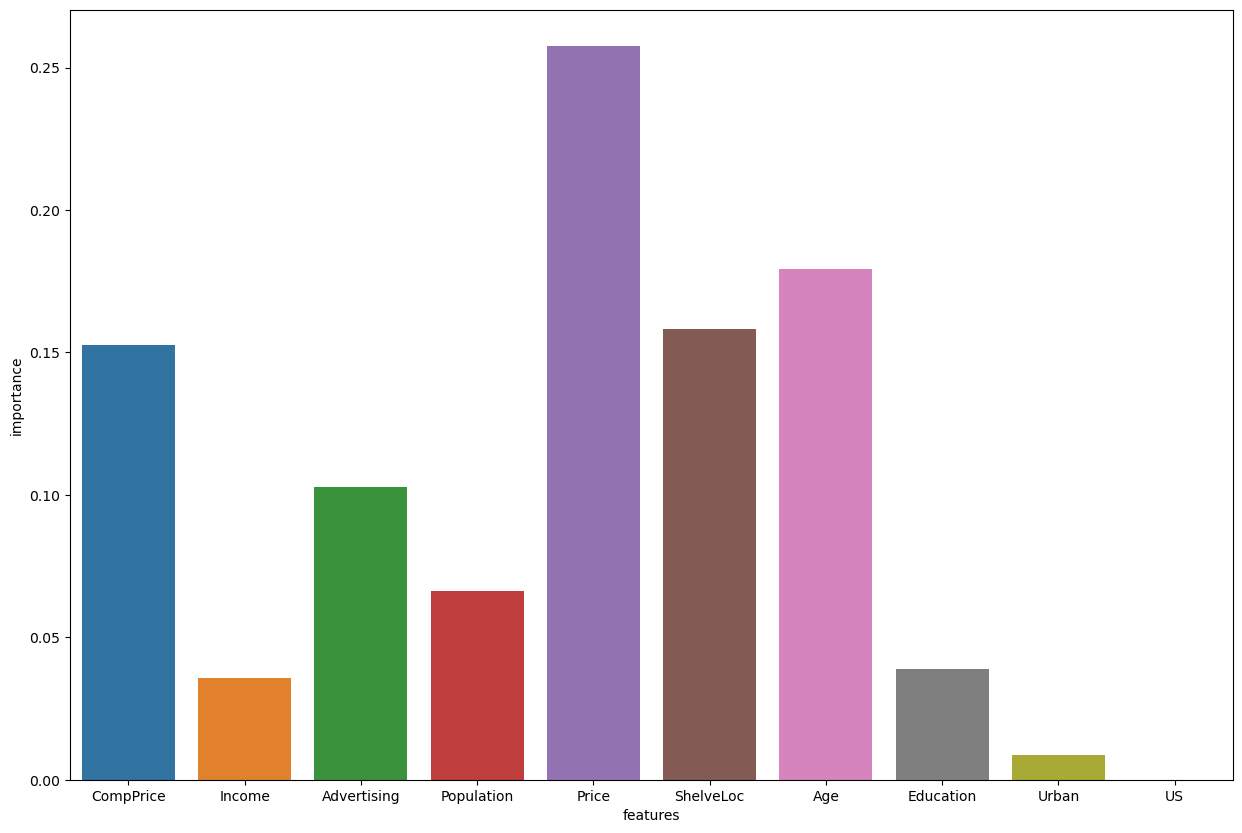

In [55]:
plt.figure(figsize=(15,10))
sns.barplot(x="features",y="importance",data=imp_df)